In [1]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=fa50c179-e011-469a-9506-0fc69eff0875
To: /content/data.zip
100% 76.1M/76.1M [00:01<00:00, 74.1MB/s]


In [2]:
!unzip data

Archive:  data.zip
   creating: data/
   creating: data/.ipynb_checkpoints/
   creating: data/test/
   creating: data/test/American_egret/
  inflating: data/test/American_egret/n02009912_2473.JPEG  
   creating: data/test/Doberman/
  inflating: data/test/Doberman/n02107142_52285.JPEG  
   creating: data/test/Rhodesian_ridgeback/
  inflating: data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: data/test/African_crocodile/
  inflating: data/test/African_crocodile/n01697457_18534.JPEG  
   creating: data/test/Lakeland_terrier/
  inflating: data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: data/test/ambulance/
  inflating: data/test/ambulance/n02701002_2311.JPEG  
   creating: data/test/apiary/
  inflating: data/test/apiary/n02727426_4398.JPEG  
   creating: data/test/bannister/
  inflating: data/test/bannister/n02788148_47071.JPEG  
   creating: data/test/basketball/
  inflating: data/test/basketball/n02802426_12693.JPEG  
   creating: data/test/barn_spider/
  in

In [3]:
!pip install chromadb
!pip install open-clip-torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.9 MB/s eta 0:00:00

In [44]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

## Create a list of all image paths

In [5]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [6]:
def get_files_path(path):
    files_path = []
    for label in CLASS_NAME:
        label_path = os.path.join(path, label)
        for filename in os.listdir(label_path):
            files_path.append(os.path.join(label_path, filename))
    return files_path

In [7]:
data_path = f'{ROOT}/train'
files_path = get_files_path(data_path)
files_path

['data/train/African_crocodile/n01697457_14906.JPEG',
 'data/train/African_crocodile/n01697457_5586.JPEG',
 'data/train/African_crocodile/n01697457_85.JPEG',
 'data/train/African_crocodile/n01697457_1331.JPEG',
 'data/train/African_crocodile/n01697457_104.JPEG',
 'data/train/African_crocodile/n01697457_10393.JPEG',
 'data/train/African_crocodile/n01697457_18587.JPEG',
 'data/train/African_crocodile/n01697457_260.JPEG',
 'data/train/African_crocodile/n01697457_8136.JPEG',
 'data/train/African_crocodile/n01697457_8331.JPEG',
 'data/train/American_egret/n02009912_26245.JPEG',
 'data/train/American_egret/n02009912_36395.JPEG',
 'data/train/American_egret/n02009912_4403.JPEG',
 'data/train/American_egret/n02009912_8563.JPEG',
 'data/train/American_egret/n02009912_16896.JPEG',
 'data/train/American_egret/n02009912_1358.JPEG',
 'data/train/American_egret/n02009912_15872.JPEG',
 'data/train/American_egret/n02009912_5700.JPEG',
 'data/train/American_egret/n02009912_7609.JPEG',
 'data/train/Amer

## Image Embedding

In [13]:
embedding_function = OpenCLIPEmbeddingFunction()

def get_single_image_embedding(image):
    embedding = embedding_function._encode_image(np.array(image))
    return embedding

In [14]:
test_im = Image.open(files_path[0])
get_single_image_embedding(test_im)

[0.012904921546578407,
 0.08428841829299927,
 -0.14379462599754333,
 -0.009020240977406502,
 -0.006787408143281937,
 -0.04422752186655998,
 0.013202453963458538,
 -0.03225922957062721,
 0.051482316106557846,
 0.004696464166045189,
 -0.017692970111966133,
 0.006776198744773865,
 0.013975244015455246,
 -0.04471940919756889,
 0.015610509552061558,
 0.05906151980161667,
 -0.09000776708126068,
 0.061290718615055084,
 -0.018374642357230186,
 -0.013666149228811264,
 -0.014436778612434864,
 0.01786407269537449,
 -0.007305396255105734,
 -0.020770283415913582,
 0.01062595285475254,
 -0.03799811005592346,
 -0.022840382531285286,
 0.004404102917760611,
 -0.03908596932888031,
 0.057974133640527725,
 -0.011919609270989895,
 -0.042896680533885956,
 0.024684639647603035,
 0.04578729718923569,
 0.007795196026563644,
 -0.004569066688418388,
 -0.013910575769841671,
 0.007514507509768009,
 -0.04430021718144417,
 -0.014852453954517841,
 0.018209800124168396,
 0.009658372960984707,
 0.01692437380552292,
 -0

## Chromadb L2 Embedding Collection

In [15]:
def add_embedding(collection, files_path):
    ids = []
    embeddings = []
    for id_filepath, filepath in enumerate(tqdm(files_path)):
        ids.append(f'id_{id_filepath}')
        image = Image.open(filepath)
        embedding = get_single_image_embedding(image)
        embeddings.append(embedding)

    collection.add(
        embeddings=embeddings,
        ids=ids
    )

In [16]:
# Create a Chroma Client
chroma_client = chromadb.Client()

# Create a collection
l2_collection = chroma_client.get_or_create_collection(name="l2_collection",
                                                       metadata={"hnsw:space": "l2"})
add_embedding(collection=l2_collection,
              files_path=files_path)

<ipython-input-15-80a00b55ae4a>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for id_filepath, filepath in enumerate(tqdm(files_path)):


  0%|          | 0/595 [00:00<?, ?it/s]

## Image Searching with L2 Collection

In [17]:
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

In [39]:
IMAGE_SIZE = (448, 448)

def plot_results(query_path, files_path, results):
    query_image = read_image_from_path(query_path, size=IMAGE_SIZE)
    images = [query_image]
    class_name = []
    for img_idx in results['ids'][0]:
        img_idx = int(img_idx.split('_')[-1])
        image = read_image_from_path(files_path[img_idx], size=IMAGE_SIZE)
        images.append(image)
        class_name.append(files_path[img_idx].split('/')[2])

    fig, axes = plt.subplots((len(images) + 1) // 3, 3, figsize=(12, 8))
    axes = axes.flatten()
    for i, image in enumerate(images):
        axes[i].imshow(image)
        if i == 0:
            axes[i].set_title(f'Query Image: {query_path.split("/")[2]}')
        else:
            axes[i].set_title(f'Top {i+1}: {class_name[i-1]}')
        axes[i].axis('off')


    plt.tight_layout()
    plt.show()

In [18]:
def search(image_path, collection, n_results=5):
    query_image = Image.open(image_path)
    query_embedding = get_single_image_embedding(query_image)
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=n_results
    )
    return results

In [21]:
test_path = f'{ROOT}/test'
test_files_path = get_files_path(test_path)
test_path = test_files_path[1]
l2_results = search(test_path, l2_collection, 5)
l2_results

{'ids': [['id_10', 'id_13', 'id_18', 'id_19', 'id_12']],
 'distances': [[0.40494874119758606,
   0.4122699201107025,
   0.5080230832099915,
   0.5198448896408081,
   0.5294203758239746]],
 'metadatas': [[None, None, None, None, None]],
 'embeddings': None,
 'documents': [[None, None, None, None, None]],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

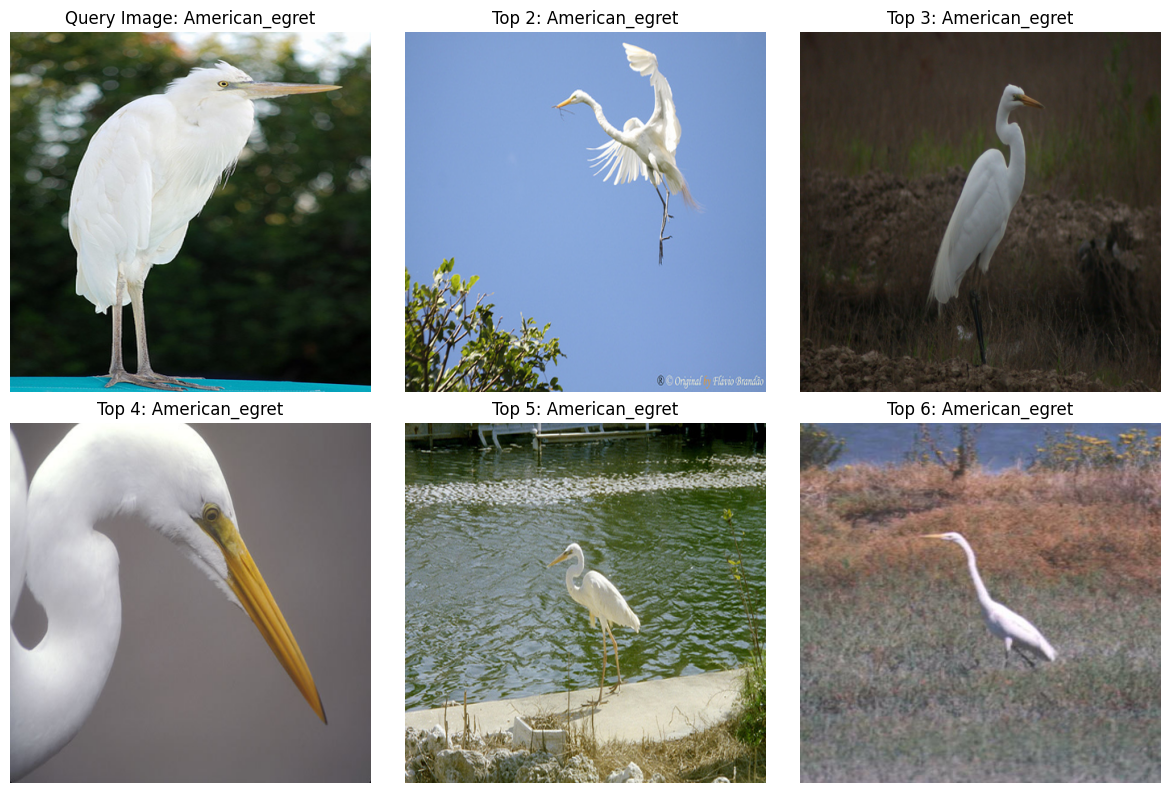

In [40]:
plot_results(query_path=test_path,
             files_path=files_path,
             results=l2_results)

## Image Searching with Cosine Similarity Collection

In [41]:
cosine_collection = chroma_client.get_or_create_collection(name="cosine_collection",
                                                           metadata={"hnsw:space": "cosine"})

add_embedding(collection=cosine_collection,
              files_path=files_path)

<ipython-input-15-80a00b55ae4a>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for id_filepath, filepath in enumerate(tqdm(files_path)):


  0%|          | 0/595 [00:00<?, ?it/s]

In [42]:
cosine_results = search(test_path, cosine_collection, 5)
cosine_results

{'ids': [['id_10', 'id_13', 'id_18', 'id_19', 'id_12']],
 'distances': [[0.20247411727905273,
   0.20613503456115723,
   0.2540115714073181,
   0.25992196798324585,
   0.264710009098053]],
 'metadatas': [[None, None, None, None, None]],
 'embeddings': None,
 'documents': [[None, None, None, None, None]],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

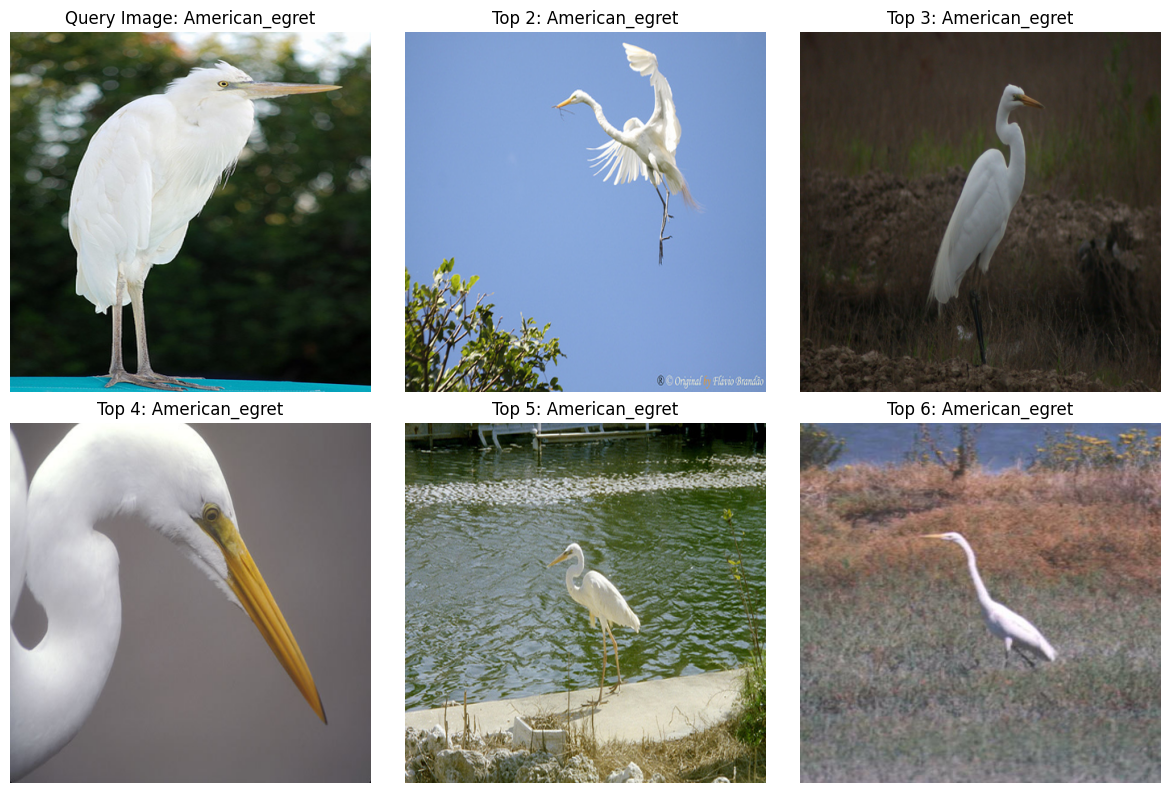

In [43]:
plot_results(query_path=test_path,
             files_path=files_path,
             results=cosine_results)